In [112]:
import numpy as np
import pandas as pd

In [113]:
data_set = pd.read_csv('Flight_Price_Dataset_Q2.csv')
X = data_set.drop(columns='price')
Y = data_set['price']

In [114]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [115]:
#Data Filling
data_set.isnull().sum()

departure_time    0
stops             0
arrival_time      0
class             0
duration          0
days_left         0
price             0
dtype: int64

In [116]:
#One_Hot Encoding

x_train = pd.get_dummies(x_train, dtype=int)
x_test = pd.get_dummies(x_test, dtype=int)


In [117]:
#Data Encoding

# x_train['departure_time_encoded'] = x_train['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
# x_test['departure_time_encoded'] = x_test['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

# x_train['arrival_time_encoded'] = x_train['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
# x_test['arrival_time_encoded'] = x_test['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

# x_train['stops_encoded'] = x_train['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})
# x_test['stops_encoded'] = x_test['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})

# x_train['class_encoded'] = x_train['class'].map({'Economy': 1, 'Business': 2})
# x_test['class_encoded'] = x_test['class'].map({'Economy': 1, 'Business': 2})


# x_train = x_train.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])
# x_test = x_test.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])



In [118]:
x_train

,duration,days_left,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
66838,14.17,29,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
151785,23.33,31,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
56501,9.92,9,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
59085,15.83,25,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
235037,15.67,46,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176313,23.25,27,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
58991,22.67,24,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
202549,24.58,2,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
131065,8.33,28,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [119]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns, index=x_test.index)

In [120]:
from sklearn.metrics import mean_squared_error , r2_score
import time

class Regression:
    def __init__(self):
        self.mse_g = None
        self.r2_g = None
        self.weight = None

    def fit(self, x:pd.DataFrame, y:pd.DataFrame, epoch:int, learning_rate: int):
        m = len(x)
        if x.iloc[0, 0] != 1:
            x.insert(0, 'bias', 1)

        self.mse_g = np.ones(epoch)
        self.r2_g = np.ones(epoch)
        self.weight = np.ones(len(x_train.columns))

        start_time = time.time()
        for i in range(epoch):
            gradient = 2/m * x.T.dot(self.predict(x) - y)
            self.weight = self.weight - learning_rate * gradient
            self.mse_g[i] = mean_squared_error(y, self.predict(x))
            self.r2_g[i] = r2_score(y, self.predict(x))
        print ("My program took", time.time() - start_time, "to run")

    def predict(self, df:pd.DataFrame):
        if df.iloc[0, 0] != 1:
            df.insert(0, 'bias', 1)
        return np.dot(df, self.weight)

In [121]:
reg = Regression()

epochs = 100
reg.fit(x_train, y_train, epochs, 0.1)
reg.weight

My program took 7.91107702255249 to run


bias                            20913.164134
duration                          207.009190
days_left                       -1781.572392
departure_time_Afternoon         -288.017338
departure_time_Early_Morning        5.216175
departure_time_Evening             54.757725
departure_time_Late_Night          38.387701
departure_time_Morning            135.887641
departure_time_Night               60.538934
stops_one                         963.244172
stops_two_or_more                1050.001096
stops_zero                      -1759.604139
arrival_time_Afternoon           -330.696805
arrival_time_Early_Morning       -376.421788
arrival_time_Evening              292.373674
arrival_time_Late_Night          -141.920048
arrival_time_Morning              -35.465798
arrival_time_Night                242.561017
class_Business                  10537.985243
class_Economy                  -10535.985243
dtype: float64

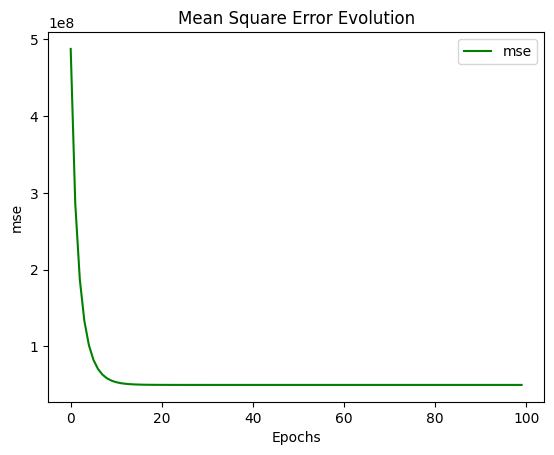

In [122]:
#mse plot
import matplotlib.pyplot as plt

plt.plot(range(epochs), reg.mse_g, 'g', label='mse')
plt.title('Mean Square Error Evolution')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

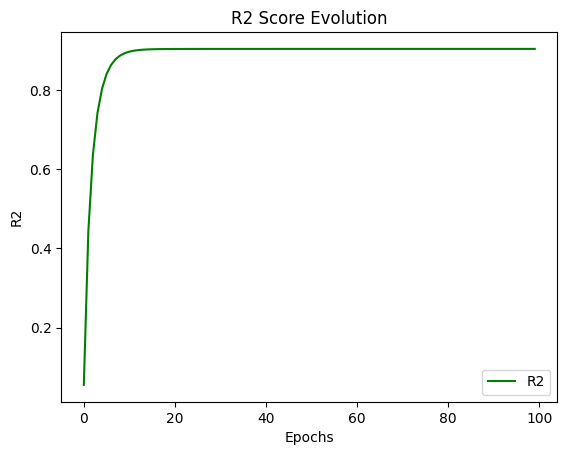

In [123]:
#R2 plot
plt.plot(range(epochs), reg.r2_g, 'g', label='R2')
plt.title('R2 Score Evolution')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

In [124]:
#Evaluating Model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_test = reg.predict(x_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

ev_tabel = pd.DataFrame({'Value': [mae_test, mse_test, rmse_test, r2_test]}, index=['MAE', 'MSE', 'RMSE', 'R2'])
ev_tabel

,Value
MAE,4.676668e+03
MSE,5.020320e+07
RMSE,7.085421e+03
R2,9.018331e-01
